<a href="https://colab.research.google.com/github/ahamedistiaque/Deep-Learning/blob/main/cifar10_Image__classification__ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Small Image Classification Using Simple Aritifical Neural Network


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

GPU Checking

In [ ]:
tf.config.experimental.list_physical_devices()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
tf.test.is_built_with_cuda()


True

cifar10 dataset load

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


In [ ]:
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (50000, 32, 32, 3)
x_test (10000, 32, 32, 3)
y_train (50000, 1)
y_test (10000, 1)


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [ ]:
classes[y_train[3][0]]


'deer'

flattern image

In [ ]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
x_train=x_train/255
x_test_flatn=x_test/255


In [ ]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
#x_train_flatten=x_train.reshape(len(x_train),3072)


on hot encoding with y train/test[y_train_categorical]

In [ ]:
y_train_ct = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_ct = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [ ]:
y_train_ct

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt

def show_image(img):
    plt.figure(figsize=(2,2))
    plt.imshow(img)
    plt.show()


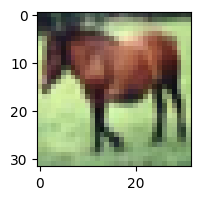

In [ ]:
show_image(x_train[7])

ANN model 

In [ ]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train_ct, epochs=100)


Epoch 1/100
1563/1563 [==============================] - 165s 105ms/step - loss: 1.8095 - accuracy: 0.3537
Epoch 2/100
1563/1563 [==============================] - 145s 93ms/step - loss: 1.6202 - accuracy: 0.4291
Epoch 3/100
1563/1563 [==============================] - 148s 95ms/step - loss: 1.5393 - accuracy: 0.4561
Epoch 4/100
1563/1563 [==============================] - 145s 93ms/step - loss: 1.4806 - accuracy: 0.4780
Epoch 5/100
1563/1563 [==============================] - 145s 93ms/step - loss: 1.4283 - accuracy: 0.4966
Epoch 6/100
1563/1563 [==============================] - 150s 96ms/step - loss: 1.3876 - accuracy: 0.5096
Epoch 7/100
1563/1563 [==============================] - 146s 93ms/step - loss: 1.3493 - accuracy: 0.5260
Epoch 8/100
1563/1563 [==============================] - 148s 95ms/step - loss: 1.3150 - accuracy: 0.5372
Epoch 9/100
1563/1563 [==============================] - 150s 96ms/step - loss: 1.2817 - accuracy: 0.5505
Epoch 10/100
1563/1563 [=====================

In [ ]:
model.evaluate(x_train,y_train_ct)

In [ ]:
predict=model.predict(x_test)

In [ ]:
show_image(x_test[800])

In [ ]:
y_predict=[np.argmax(i) for i in predict]
y_predict[:7]

In [ ]:
y_predict[403]

In [ ]:
classes[y_predict[403]]

testing time

In [ ]:
y_test[403]

In [ ]:
classes[y_train[6][0]]


In [ ]:
import seaborn as sns


In [ ]:
#y_predicted = model.predict(X_test_flattened)
#y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predict)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

performance test

In [ ]:
def get_model():
  model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])
  model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

  return model



In [ ]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train, y_train_ct, epochs=1)

In [ ]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    Gpu_model = get_model()
    Gpu_model.fit(x_train, y_train_ct, epochs=50)

In [ ]:
with tf.device('/device:GPU:0'):
  gpu_model = get_model()
  gpu_model.fit(x_train, y_train_ct, epochs=1)

In [ ]:
model.evaluate(x_train,y_train_ct)